In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
from sklearn.decomposition import PCA

from sklearn import set_config
set_config(transform_output="pandas")

In [3]:
url = f"https://drive.google.com/file/d/1fkXgSanK64YOuGo1N1GTd6ejjZ-Pvc6m/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
# Create a Pandas DataFrame from the CSV data
df = pd.read_csv(path)
df

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


In [4]:
df.columns =df.columns.str.strip()

In [5]:
df_unique = df.drop_duplicates(subset='id', keep='first')
df_unique

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


In [6]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5171 entries, 0 to 5234
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5171 non-null   int64  
 1   name              5171 non-null   object 
 2   artist            5171 non-null   object 
 3   danceability      5171 non-null   float64
 4   energy            5171 non-null   float64
 5   key               5171 non-null   int64  
 6   loudness          5171 non-null   float64
 7   mode              5171 non-null   int64  
 8   speechiness       5171 non-null   float64
 9   acousticness      5171 non-null   float64
 10  instrumentalness  5171 non-null   float64
 11  liveness          5171 non-null   float64
 12  valence           5171 non-null   float64
 13  tempo             5171 non-null   float64
 14  type              5171 non-null   object 
 15  duration_ms       5171 non-null   int64  
 16  time_signature    5171 non-null   int64  
 17  

In [7]:
df_unique['time_signature'].value_counts()

,count
time_signature,
4,4631
3,418
5,69
1,52
0,1


In [8]:
songs_df = df_unique[ ['danceability', 'energy','mode', 'speechiness','key','loudness','acousticness', 'instrumentalness', 'liveness', 'valence', 'time_signature','tempo', 'id']]
songs_df = songs_df.set_index('id')
songs_df


,danceability,energy,mode,speechiness,key,loudness,acousticness,instrumentalness,liveness,valence,time_signature,tempo
id,,,,,,,,,,,,
1n7JnwviZ7zf0LR1tcGFq7,0.6580,0.25900,0,0.0705,11,-13.141,0.694,0.000059,0.9750,0.3060,4,110.376
5QGM1U0eCYrQuwSJwTm5Zq,0.7420,0.39900,1,0.0346,2,-12.646,0.217,0.000002,0.1070,0.6930,4,125.039
0NLIFSZxPzQhCwnkn5PJYs,0.8510,0.73000,1,0.3470,2,-11.048,0.453,0.000063,0.1240,0.9050,4,93.698
3mXqOdlLE1k67WsAxryPFs,0.7050,0.05020,1,0.0471,4,-18.115,0.879,0.000041,0.3860,0.5240,4,106.802
7bSzjzjTkWT2CkIPPdp0eA,0.6510,0.11900,1,0.0380,6,-19.807,0.916,0.000343,0.1040,0.4020,4,120.941
...,...,...,...,...,...,...,...,...,...,...,...,...
1aEhYlZtypmipA06SDJ4U3,0.2020,0.06940,1,0.0473,3,-23.390,0.917,0.715000,0.0832,0.0655,4,87.906
1Gfqe7TAKklmuZf6hxsH6h,0.1880,0.10100,1,0.0442,6,-21.873,0.855,0.426000,0.0694,0.0355,4,83.134
2XNwnFrdMDpismp0VUZ7cU,0.0596,0.00093,1,0.0434,9,-42.959,0.951,0.969000,0.0772,0.0344,3,71.573


In [9]:
scaler = MinMaxScaler()
scaled_min_max_df = scaler.fit_transform(songs_df)
scaled_min_max_df = pd.DataFrame(scaled_min_max_df, columns=songs_df.columns)
scaled_min_max_df

,danceability,energy,mode,speechiness,key,loudness,acousticness,instrumentalness,liveness,valence,time_signature,tempo
id,,,,,,,,,,,,
1n7JnwviZ7zf0LR1tcGFq7,0.680455,0.25900,0.0,0.076797,1.000000,0.763897,0.696787,0.000060,0.987842,0.310660,0.8,0.515800
5QGM1U0eCYrQuwSJwTm5Zq,0.767322,0.39900,1.0,0.037691,0.181818,0.771967,0.217871,0.000002,0.108409,0.703553,0.8,0.584322
0NLIFSZxPzQhCwnkn5PJYs,0.880041,0.73000,1.0,0.377996,0.181818,0.798018,0.454819,0.000064,0.125633,0.918782,0.8,0.437862
3mXqOdlLE1k67WsAxryPFs,0.729059,0.05020,1.0,0.051307,0.363636,0.682811,0.882530,0.000041,0.391084,0.531980,0.8,0.499098
7bSzjzjTkWT2CkIPPdp0eA,0.673216,0.11900,1.0,0.041394,0.545455,0.655228,0.919679,0.000348,0.105370,0.408122,0.8,0.565171
...,...,...,...,...,...,...,...,...,...,...,...,...
1aEhYlZtypmipA06SDJ4U3,0.208893,0.06940,1.0,0.051525,0.272727,0.596818,0.920683,0.725888,0.084296,0.066497,0.8,0.410795
1Gfqe7TAKklmuZf6hxsH6h,0.194416,0.10100,1.0,0.048148,0.545455,0.621548,0.858434,0.432487,0.070314,0.036041,0.8,0.388495
2XNwnFrdMDpismp0VUZ7cU,0.061634,0.00093,1.0,0.047277,0.818182,0.277803,0.954819,0.983756,0.078217,0.034924,0.6,0.334469


In [10]:

seed =123

max_k = 100

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(20, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      n_init = 10,
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(scaled_min_max_df)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

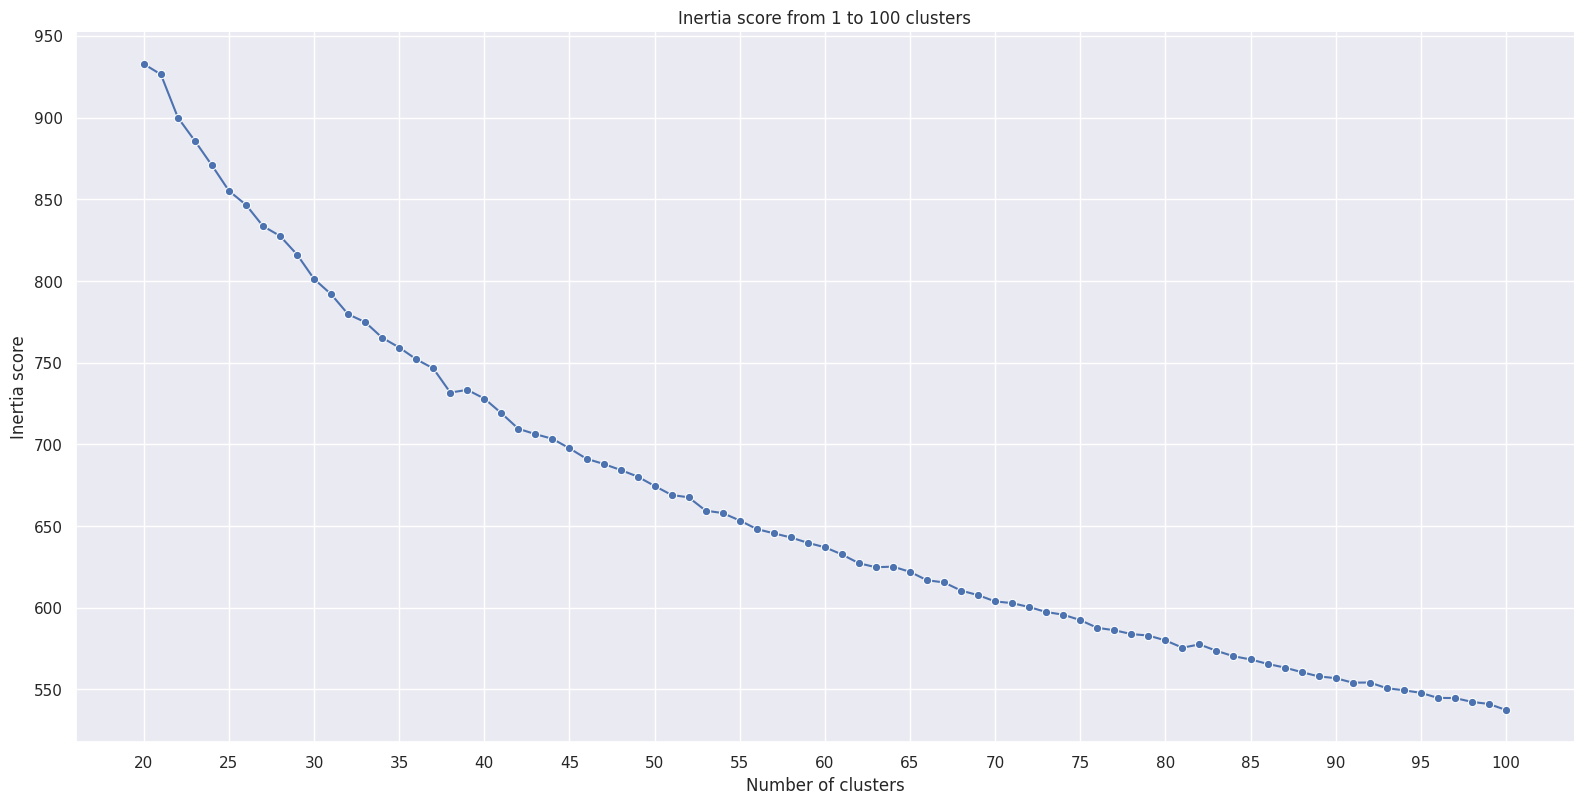

In [ ]:

sns.set_theme(style='darkgrid')

(

sns.relplot(y = inertia_list,
            x = range(20, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
.set(xticks=list(range(20, max_k + 1, 5)))
);

In [ ]:

max_k = 100

sil_scores = []


for j in range(20, max_k):


    kmeans = KMeans(n_clusters = j,
                    n_init = 10,
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(scaled_min_max_df)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(scaled_min_max_df, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)

KeyboardInterrupt: 

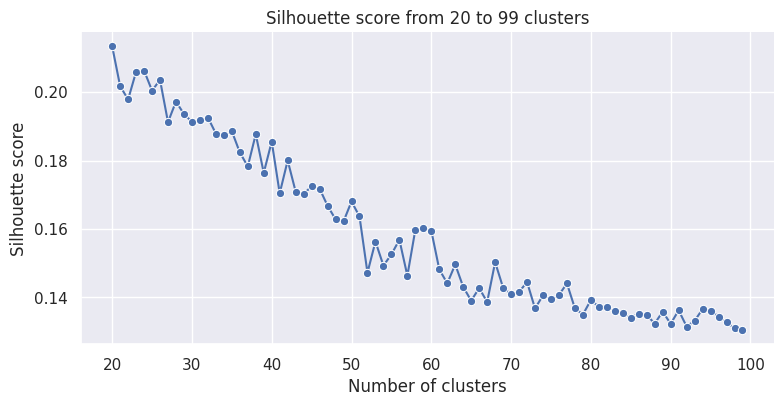

In [ ]:
(
sns.relplot(y = sil_scores,
            x = range(20, max_k),
            kind = 'line',
            marker = 'o',
            height = 4,
            aspect = 2)
.set(title=f"Silhouette score from 20 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

In [ ]:
random_seed = 123
allp_minmax = KMeans(n_clusters=24, random_state=random_seed)
allp_minmax.fit(scaled_min_max_df)

## fit the model to the data
table = allp_minmax.labels_
scaled_min_max_df["cluster_24"] = table
scaled_min_max_df.sort_values(by='cluster_24', ascending=True)

,danceability,energy,mode,speechiness,key,loudness,acousticness,instrumentalness,liveness,valence,time_signature,tempo,cluster_24
id,,,,,,,,,,,,,
3yJdWQxmFO7nvNjEybCeYE,0.507756,0.958,1.0,0.153595,0.909091,0.918636,0.007490,0.000034,0.657548,0.349239,0.8,0.701439,0
5qkFnFCahydsnxjWm1SR4J,0.199586,0.479,1.0,0.048039,0.636364,0.841088,0.076104,0.000000,0.150963,0.081117,0.6,0.358274,0
3khoTXZLzriag5yLXcaDZc,0.517063,0.984,1.0,0.314815,0.727273,0.896873,0.001817,0.000012,0.085208,0.288325,0.8,0.747362,0
4gQ8q2cDKHoaQsLLVfp9NH,0.200620,0.642,1.0,0.062527,1.000000,0.865101,0.366466,0.000000,0.721378,0.268020,0.6,0.768942,0
077IVIW6uv1lL78x7a3Oc3,0.319545,0.544,1.0,0.383442,0.818182,0.821281,0.155622,0.000269,0.073658,0.162437,0.8,0.845736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0IAIQhIMw8ehSQdR2Nxlab,0.301965,0.989,1.0,0.084205,0.545455,0.852841,0.000289,0.940102,0.143870,0.573604,0.6,0.731889,23
2Hg3t86fN2WAKY8HeaJc7q,0.822130,0.509,1.0,0.054248,0.363636,0.793225,0.435743,0.578680,0.111449,0.193909,0.8,0.570312,23
5JwUWwgqAaG8PrQ96YMMdT,0.803516,0.892,1.0,0.102397,0.363636,0.866437,0.008835,0.572589,0.303951,0.730964,0.8,0.602631,23


In [22]:
random_seed = 123
allp_minmax = KMeans(n_clusters=38, random_state=random_seed)
allp_minmax.fit(scaled_min_max_df)

## fit the model to the data
table = allp_minmax.labels_
scaled_min_max_df["cluster_38"] = table


In [24]:
random_seed = 123
allp_minmax = KMeans(n_clusters=24, random_state=random_seed)
allp_minmax.fit(scaled_min_max_df)

## fit the model to the data
table = allp_minmax.labels_
scaled_min_max_df["cluster_24"] = table

In [25]:
random_seed = 123
allp_minmax = KMeans(n_clusters=21, random_state=random_seed)
allp_minmax.fit(scaled_min_max_df)

## fit the model to the data
table = allp_minmax.labels_
scaled_min_max_df["cluster_21"] = table
scaled_min_max_df

,danceability,energy,mode,speechiness,key,loudness,acousticness,instrumentalness,liveness,valence,time_signature,tempo,cluster_21,cluster_38,cluster_24
id,,,,,,,,,,,,,,,
1n7JnwviZ7zf0LR1tcGFq7,0.680455,0.25900,0.0,0.076797,1.000000,0.763897,0.696787,0.000060,0.987842,0.310660,0.8,0.515800,20,25,7
5QGM1U0eCYrQuwSJwTm5Zq,0.767322,0.39900,1.0,0.037691,0.181818,0.771967,0.217871,0.000002,0.108409,0.703553,0.8,0.584322,7,6,10
0NLIFSZxPzQhCwnkn5PJYs,0.880041,0.73000,1.0,0.377996,0.181818,0.798018,0.454819,0.000064,0.125633,0.918782,0.8,0.437862,6,14,6
3mXqOdlLE1k67WsAxryPFs,0.729059,0.05020,1.0,0.051307,0.363636,0.682811,0.882530,0.000041,0.391084,0.531980,0.8,0.499098,18,22,18
7bSzjzjTkWT2CkIPPdp0eA,0.673216,0.11900,1.0,0.041394,0.545455,0.655228,0.919679,0.000348,0.105370,0.408122,0.8,0.565171,11,34,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1aEhYlZtypmipA06SDJ4U3,0.208893,0.06940,1.0,0.051525,0.272727,0.596818,0.920683,0.725888,0.084296,0.066497,0.8,0.410795,9,20,4
1Gfqe7TAKklmuZf6hxsH6h,0.194416,0.10100,1.0,0.048148,0.545455,0.621548,0.858434,0.432487,0.070314,0.036041,0.8,0.388495,6,17,6
2XNwnFrdMDpismp0VUZ7cU,0.061634,0.00093,1.0,0.047277,0.818182,0.277803,0.954819,0.983756,0.078217,0.034924,0.6,0.334469,6,17,6


In [26]:
from sklearn.metrics import silhouette_score
score_24 = silhouette_score(scaled_min_max_df.drop(columns=['cluster_24']), scaled_min_max_df['cluster_24'])
print(f"Silhouette score (24 clusters): {score_24:.4f}")
score_21 = silhouette_score(scaled_min_max_df.drop(columns=['cluster_21']), scaled_min_max_df['cluster_21'])
print(f"Silhouette score (21 clusters): {score_21:.4f}")

Silhouette score (24 clusters): 0.6784
Silhouette score (21 clusters): 0.7127


In [27]:
!pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 kB 10.0 MB/s eta 0:00:00


In [28]:
import spotipy
import pickle
from spotipy.oauth2 import SpotifyOAuth
from google.colab import userdata

In [29]:
scope = 'playlist-modify-public'
username = '31hmpr47p3y4xjcudz3txb2tzn6m'
redirectUri = 'http://127.0.0.1:8081/callback'
client_id = '6601984371c841c7af9c228bb401cd80'
client_secret = 'a3f94550c4de42fd9e1bd76e3e2acd4d'

token = SpotifyOAuth(scope=scope,
                     username=username,
                     client_id=client_id,
                     client_secret=client_secret,
                     redirect_uri=redirectUri,
                     open_browser=False # this line is need in Colab, but not on local machine
                     )
spotifyObject = spotipy.Spotify(auth_manager = token)

In [30]:
scaled_min_max_df.reset_index(inplace=True)

In [31]:
playlist_collection_24= {}

for i in range(24):
    playlist_name = f'my_playlist_cluster_{i}'
    playlist_description = 'This is a test list'

    cluster_df = scaled_min_max_df[scaled_min_max_df["cluster_24"] == i]
    if cluster_df.empty:
        print(f"❗ cluster {i} is empty.")
        continue

    try:
        playlist = spotifyObject.user_playlist_create(
            user=username,
            name=playlist_name,
            public=True,
            description=playlist_description
        )
        playlist_id = playlist['id']
    except Exception as e:
        print(f"⛔ error{i}: {e}")
        continue

    sample_count = min(5, len(cluster_df))
    id_list = list(cluster_df.sample(n=sample_count, random_state=42)['id'])
    uris = [f'spotify:track:{str(track_id).strip()}' for track_id in id_list]

    try:
        spotifyObject.user_playlist_add_tracks(
            user=username,
            playlist_id=playlist_id,
            tracks=uris
        )
        playlist_collection_24[playlist_name] = playlist_id
        print(f"✅  Playlist create successfully: {playlist_name}")
    except Exception as e:
        print(f"⛔error in creating playlist {i}: {e}")

Go to the following URL: https://accounts.spotify.com/authorize?client_id=6601984371c841c7af9c228bb401cd80&response_type=code&redirect_uri=http%3A%2F%2F127.0.0.1%3A8081%2Fcallback&scope=playlist-modify-public
Enter the URL you were redirected to: http://127.0.0.1:8081/callback?code=AQBadxgJYBiAWAam6QuGbMdkCp9swsqOWwLbdWze5lFCDgTnAT6KetUgv6DuZmDAVqzIKSk3yhFE3jTetayrmkNiyCYK5vHWN-yftjdL02vEH3qAQf4O9Liy--QtzQwjFb6mH_huTZQwqdZgUdWj0b3kAlvV9bBQSiUL_8Lq59wwbTVFP9egzR_HDzX3jXNW0qxZ6XhvETlTVg
✅  Playlist create successfully: my_playlist_cluster_0
✅  Playlist create successfully: my_playlist_cluster_1
✅  Playlist create successfully: my_playlist_cluster_2
✅  Playlist create successfully: my_playlist_cluster_3
✅  Playlist create successfully: my_playlist_cluster_4
✅  Playlist create successfully: my_playlist_cluster_5
✅  Playlist create successfully: my_playlist_cluster_6
✅  Playlist create successfully: my_playlist_cluster_7
✅  Playlist create successfully: my_playlist_cluster_8
✅  Playlist cre

In [32]:
features = ['danceability', 'energy', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence','tempo']
radar_df = scaled_min_max_df.groupby('cluster_24')[features].mean().reset_index()

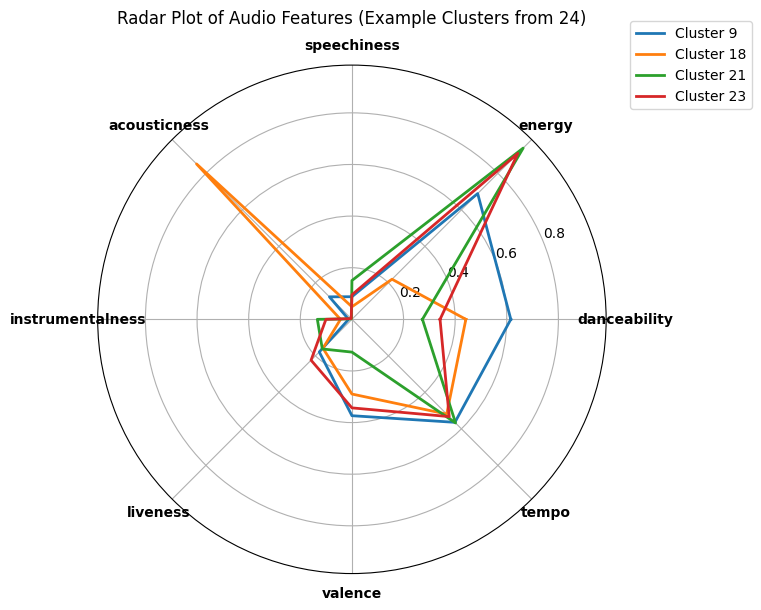

In [33]:

labels = features
num_vars = len(labels)


angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]


plt.figure(figsize=(8, 8))


example_clusters = [9,18, 21,23]

for i in example_clusters:
    values = radar_df.iloc[i][labels].tolist()
    values += values[:1]
    plt.polar(angles, values, label=f'Cluster {i}', linewidth=2)

plt.xticks(angles[:-1], labels, fontweight='bold',  fontsize=10)

plt.title("Radar Plot of Audio Features (Example Clusters from 24)", size=12, pad=30)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

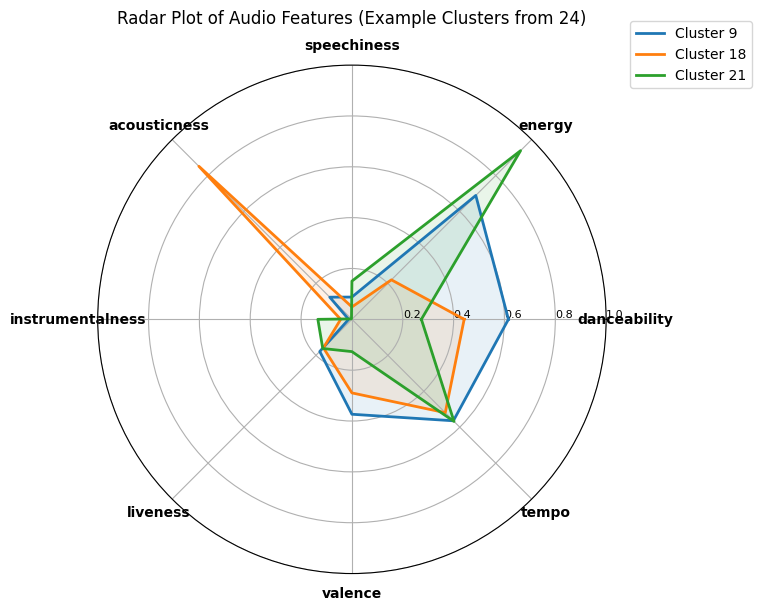

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
labels = features
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r=values,  # radius values (feature values)
    theta=labels + [labels[0]],  # features
    mode='lines+markers',  # خطوط + نقطه‌ها
    name=f'Cluster {i}',  # اسم در لجند
    line=dict(width=2)  # ضخامت خط
))
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

example_clusters = [9, 18, 21]

for i in example_clusters:
    values = radar_df.iloc[i][labels].tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {i}', linewidth=2)
    ax.fill(angles, values, alpha=0.1)  # optional fill


ax.set_ylim(0, 1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontweight='bold', fontsize=10)


ax.set_rlabel_position(0)
ax.tick_params(axis='y', labelsize=8)
ax.set_title("Radar Plot of Audio Features (Example Clusters from 24)", size=12, pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

In [35]:
import plotly.graph_objects as go
import numpy as np

labels = features
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # circle complete

fig = go.Figure()

example_clusters = [9, 18, 21]

for i in example_clusters:
    values = radar_df.iloc[i][labels].tolist()
    values += values[:1]
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=labels + [labels[0]],
        mode='lines+markers',
        name=f'Cluster {i}',
        line=dict(width=2)
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title="Radar Plot of Audio Features (Example Clusters from 24)",
    legend=dict(
        title="Clusters",
        itemclick="toggle",  # ✅ click to turn line on/off
        itemdoubleclick="toggleothers"  # ✅ double click to only show one
    )
)

fig.show()

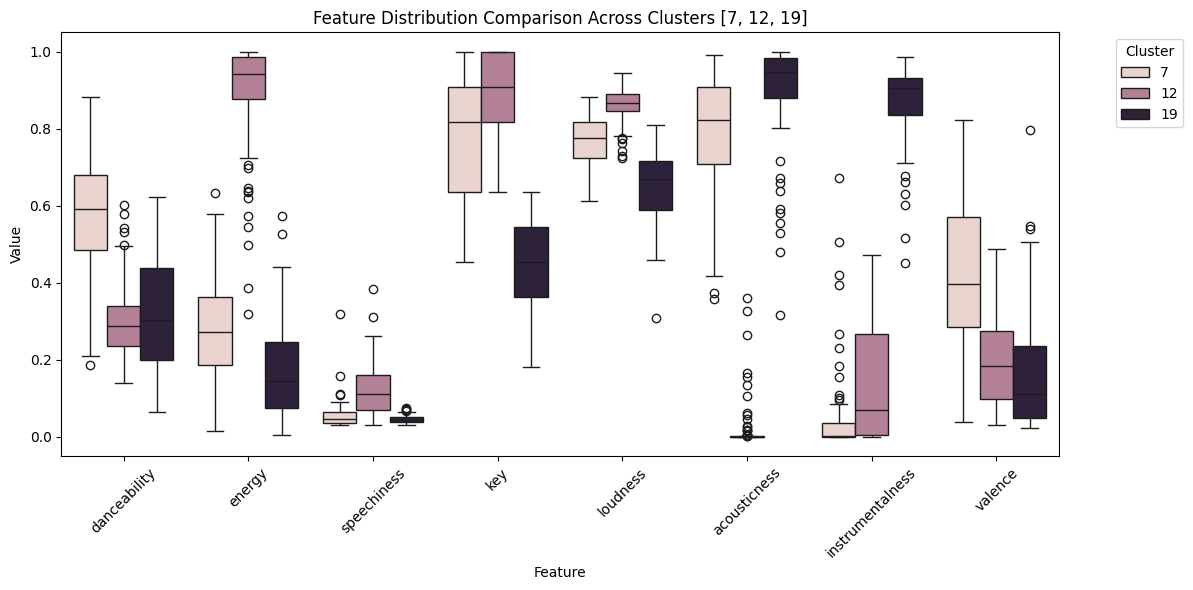

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt


selected_clusters = [7, 12, 19]
features = ['danceability', 'energy', 'speechiness','key','loudness',
            'acousticness', 'instrumentalness', 'valence',
           ]


cluster_data = scaled_min_max_df[scaled_min_max_df['cluster_24'].isin(selected_clusters)]

melted = cluster_data.melt(id_vars='cluster_24', value_vars=features, var_name='Feature', value_name='Value')

plt.figure(figsize=(12, 6))
sns.boxplot(data=melted, x='Feature', y='Value', hue='cluster_24')
plt.xticks(rotation=45)
plt.title(f"Feature Distribution Comparison Across Clusters {selected_clusters}")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

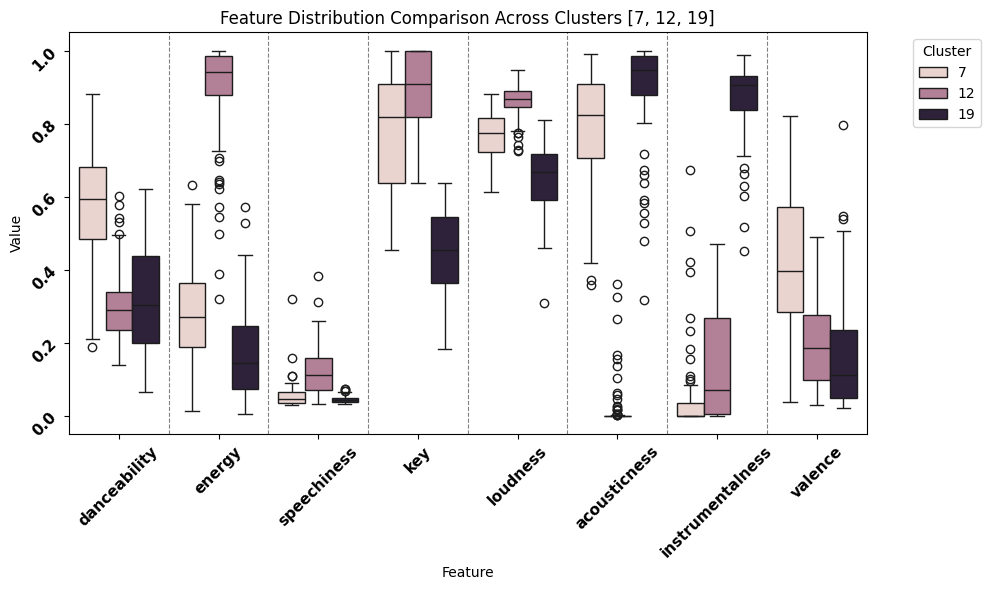

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Feature', y='Value', hue='cluster_24')
plt.xticks(rotation=45, fontweight='bold', fontsize=11)
plt.yticks(rotation=45, fontweight='bold', fontsize=11)

plt.xticks(rotation=45)

for i in range(len(features) - 1):
    plt.axvline(i + 0.5, color='gray', linestyle='--', linewidth=0.8)


plt.title(f"Feature Distribution Comparison Across Clusters {selected_clusters}")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


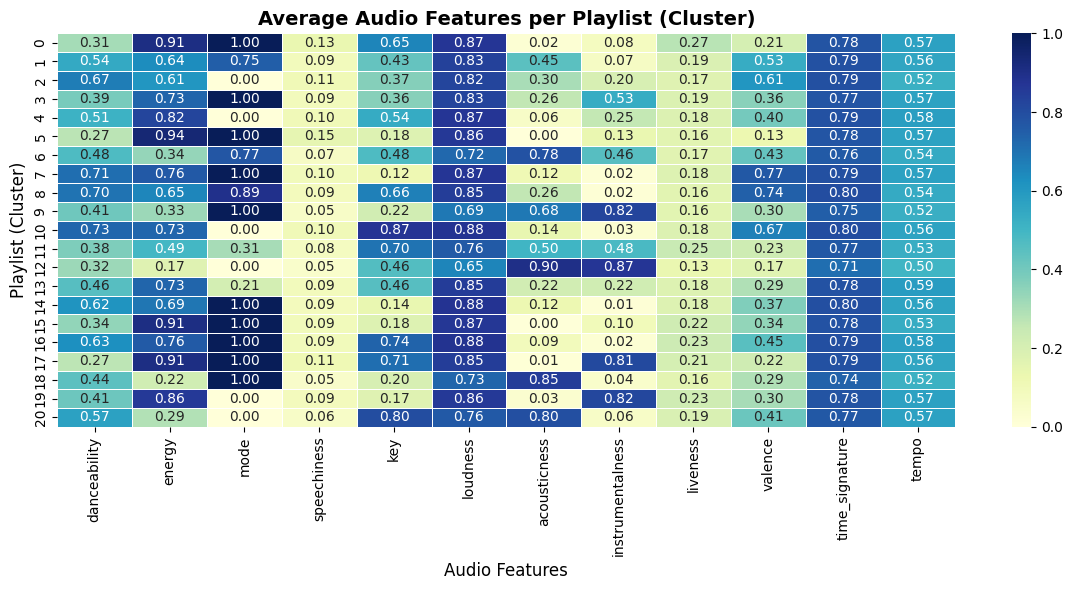

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['danceability', 'energy', 'mode', 'speechiness', 'key', 'loudness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'time_signature', 'tempo']

cluster_means = scaled_min_max_df.groupby('cluster_21')[features].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

plt.title("Average Audio Features per Playlist (Cluster)", fontsize=14, weight='bold')
plt.xlabel("Audio Features", fontsize=12)
plt.ylabel("Playlist (Cluster)", fontsize=12)
plt.tight_layout()
plt.show()

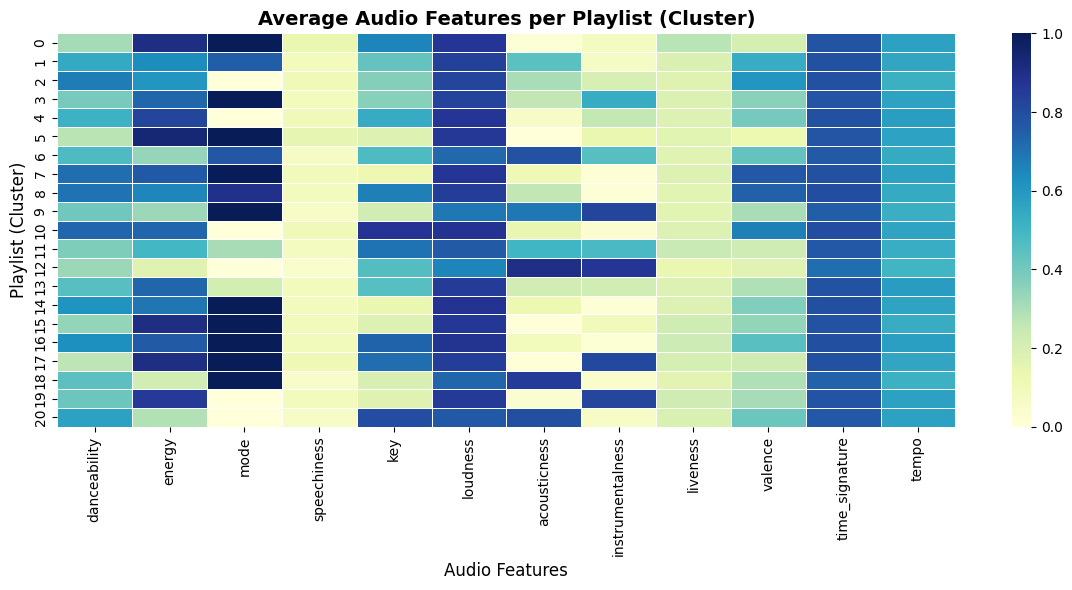

In [39]:
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, cmap="YlGnBu", linewidths=0.5, annot=False)  # فقط رنگ

plt.title("Average Audio Features per Playlist (Cluster)", fontsize=14, weight='bold')
plt.xlabel("Audio Features", fontsize=12)
plt.ylabel("Playlist (Cluster)", fontsize=12)
plt.tight_layout()
plt.show()